In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# import load_iris function from datasets module
from sklearn.datasets import load_iris

In [2]:
# load iris data set
iris = load_iris()
dataSet = iris.data
labels = iris.target

In [3]:
# according to iris dataset, the structure of input is [SepalLength, SepalWidth, PetalLength, PetalWidth]
# more details please refer to https://www.kaggle.com/uciml/iris
input = [3, 5, 4, 2]

In [4]:
# set the k value
k = 1

In [5]:
labelsNames = ["setosa", "versicolor", "virginica"]

In [6]:
# store different labels so they could be represented as index number
labelsTypes = []

# fill the labelsTypes list with different labels
for label in labels:
    # if the label found in labels is not in labelsTypes
    if not label in labelsTypes:
        # add the label to labelsTypes
        labelsTypes.append(label)
print(labelsTypes)

[0, 1, 2]


the distance is calculated as<p>
$d_{total} = \sqrt{\sum_{n=1}^Nd_n^2}$<p>
where N is the dimension of each data element and $d_n$ is the distance on each dimension.<p>
In this case, take the square root or not has no impact on the result. Therefore the algorithm could be simplified into<p>
$d_{total} = \sum_{n=1}^Nd_n^2$<p>
so the function is more efficient

In [7]:
def calculate_distance(input, dataSet, label):
    dist = []
    for i in range(len(dataSet)):
        d = 0
        for j in range(len(dataSet[i])):
            # dn is dataSet[i][j] - input[j]
            d += (dataSet[i][j] - input[j]) ** 2
        dist.append(d)

    return np.array(dist)

In [8]:
# dist is the array storing 150 points' distance
dist = calculate_distance(input, dataSet, labels)
print(dist[:5])

[16.66 17.61 16.66 15.66 15.96]


In [9]:
# a sorted index list for 150 data points according to the distance to the input point
# cut the list and keep the first k elements (smallest k elements)
k_dist_sorted_index = dist.argsort()[:k]
print(k_dist_sorted_index)

[106]


In [10]:
# list used to store the labels votes of the input
labelsVote = [0 for i in range(len(labelsTypes))]

# get the index of first k elements according to k_dist_sorted_index
for i in k_dist_sorted_index:
    # labels[i] is the label stored in index i
    # since labelsTypes and labelsVote are matched pairs(label index is same)
    # the nth element in labelsVote is labeled as labelsTypes[n]
    # therefore labelsVote[i] is the vote of label labelsTypes[n]
    labelsVote[labelsTypes.index(labels[i])] += 1
print(labelsVote)

[0, 0, 1]


In [11]:
# find the index of input label in labelsVote
inputLabelIndex = labelsVote.index(max(labelsVote))
print(inputLabelIndex)

2


In [12]:
# since labelsVote is matched with labelsTypes, the index could be directly used
inputLabel = labelsTypes[inputLabelIndex]
inputName = labelsNames[inputLabelIndex]
print("the input is labeled as ", inputLabel, "which is", inputName)

the input is labeled as  2 which is virginica


In [13]:
# set up color scheme for the plot graph
# 3 classes -> 3 colors
colors = ['b', 'g', 'r']
# set the size of the matplotlib figure
plt.rcParams['figure.figsize'] = [15, 15]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


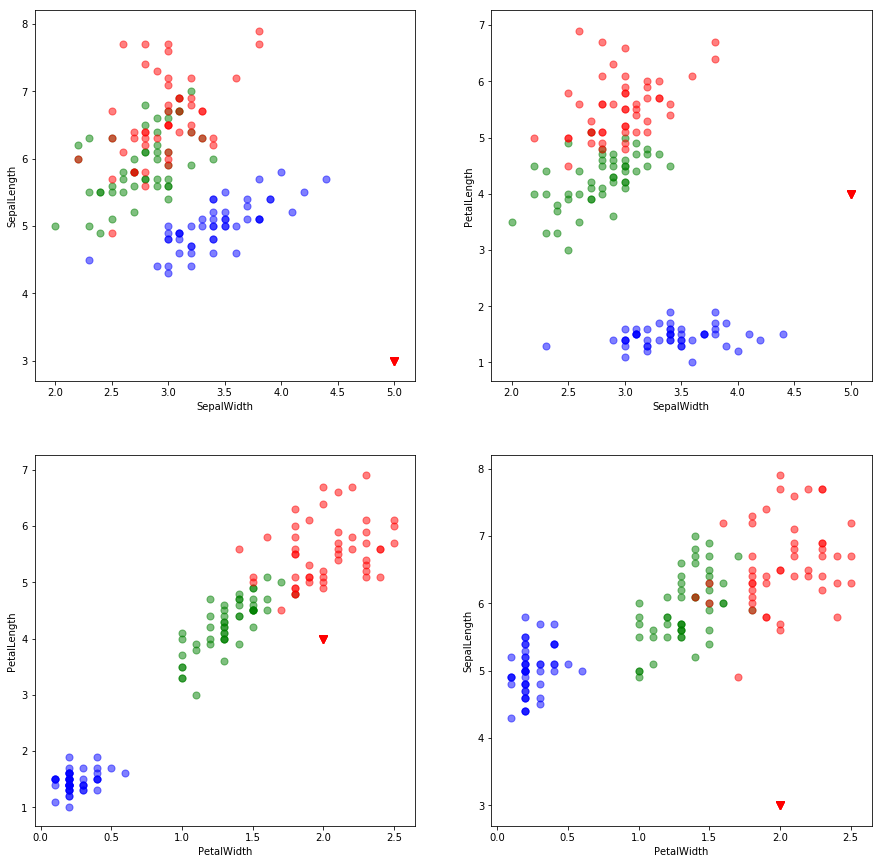

In [14]:
# plot the data set points
for pointIndex in range(len(dataSet)):
    colorIndex = labelsTypes.index(labels[pointIndex])
    
    plt.subplot(221)
    plt.scatter(dataSet[pointIndex][1], dataSet[pointIndex][0], s=50, c=colors[colorIndex], alpha=0.5)
    plt.scatter(input[1], input[0],s=50, c=colors[inputLabelIndex], marker='v', alpha=0.5)
    plt.xlabel("SepalWidth")
    plt.ylabel("SepalLength")
    
    plt.subplot(222)
    plt.scatter(dataSet[pointIndex][1], dataSet[pointIndex][2], s=50, c=colors[colorIndex], alpha=0.5)
    plt.scatter(input[1], input[2],s=50, c=colors[inputLabelIndex], marker='v', alpha=0.5)
    plt.xlabel("SepalWidth")
    plt.ylabel("PetalLength")
    
    plt.subplot(223)
    plt.scatter(dataSet[pointIndex][3], dataSet[pointIndex][2], s=50, c=colors[colorIndex], alpha=0.5)
    plt.scatter(input[3], input[2],s=50, c=colors[inputLabelIndex], marker='v', alpha=0.5)
    plt.xlabel("PetalWidth")
    plt.ylabel("PetalLength")
    
    plt.subplot(224)
    plt.scatter(dataSet[pointIndex][3], dataSet[pointIndex][0], s=50, c=colors[colorIndex], alpha=0.5)
    plt.scatter(input[3], input[0],s=50, c=colors[inputLabelIndex], marker='v', alpha=0.5)
    plt.xlabel("PetalWidth")
    plt.ylabel("SepalLength")

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


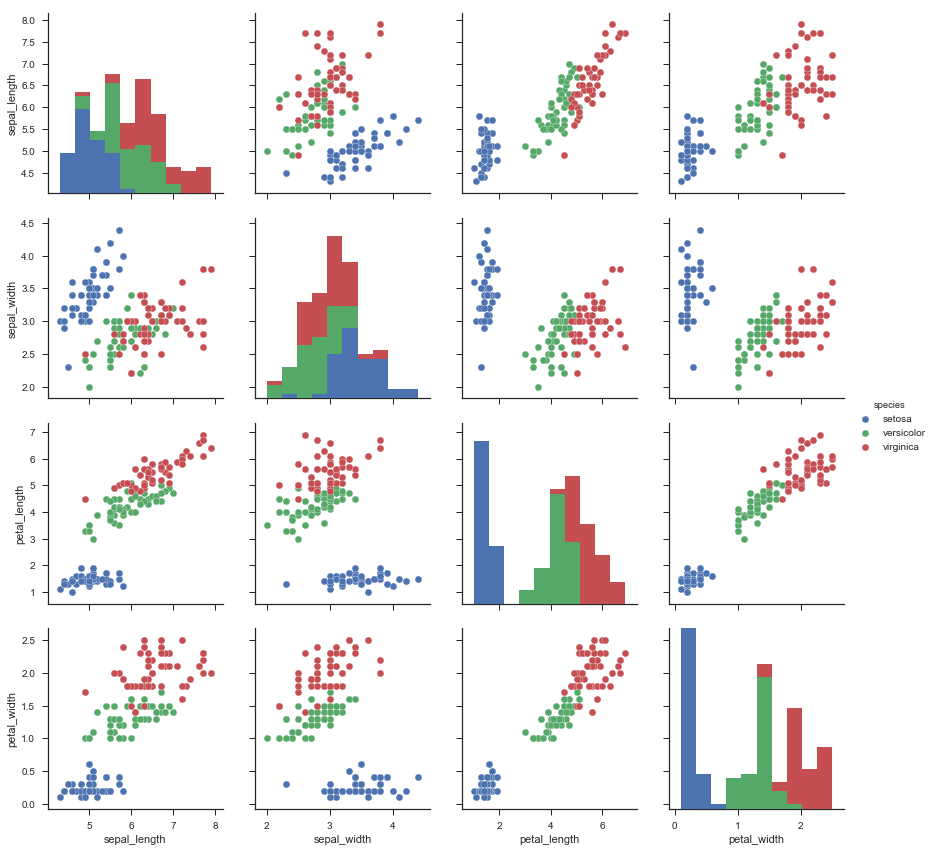

In [15]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
print(df.head(5))
sns.pairplot(df, hue="species",size=3)